In [1]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix


In [2]:
# 불필요 경고 메시지 무시
import warnings

warnings.filterwarnings('ignore')

In [55]:
from matplotlib import font_manager

 # 음수 부호가 깨지는 문제 방지
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정 (예: 'Malgun Gothic'은 윈도우에서 사용 가능)
# 맥일 경우 아래 코드 활성화
plt.rcParams['font.family'] = 'AppleGothic'
# 윈도우일 경우 아래 코드 활성화
#plt.rcParams['font.family'] = 'Malgum Gothic'

In [4]:
# read_csv()를 이용하여 저장
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# 통계값 확인
#df.describe()

# 소수점 둘째 자리까지 반올림
round(df.describe(),2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [7]:
# 결측값 확인
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


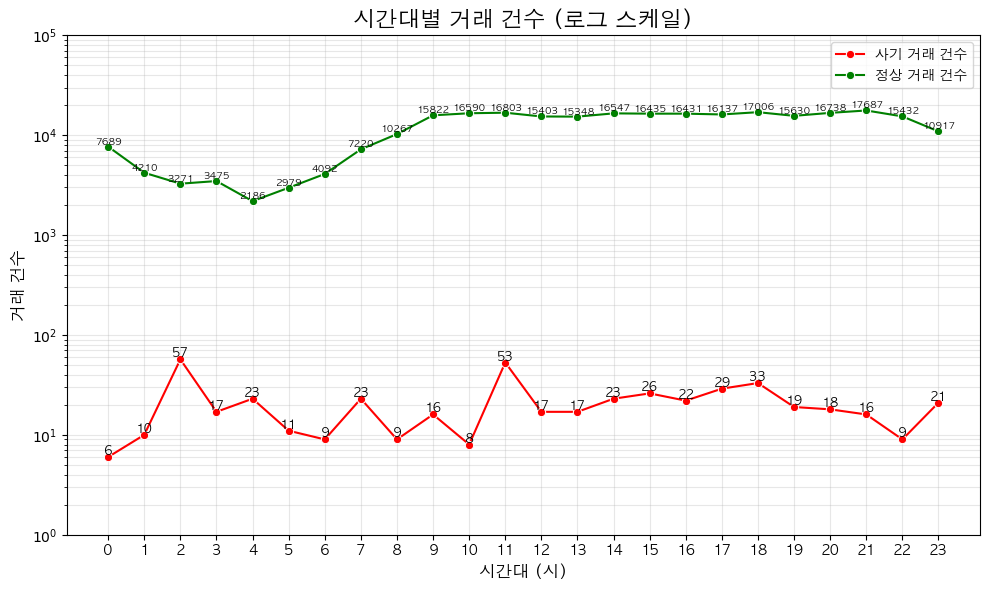

In [12]:
# 시간대 계산 (초 단위를 시간 단위로 변환)
df['Hour'] = (df['Time'] // 3600) % 24

# 시간대별 거래 건수 집계
hourly_data = df.groupby(['Hour', 'Class']).size().unstack(fill_value=0)
hourly_data.columns = ['정상 거래 건수', '사기 거래 건수']

# 로그 스케일 최소값 보정
hourly_data = hourly_data.applymap(lambda x: max(x, 1))

# 시각화
plt.figure(figsize=(10, 6))

# 사기 거래 건수
sns.lineplot(data=hourly_data, x=hourly_data.index, y='사기 거래 건수', label='사기 거래 건수', marker='o', color='red')
for x, y in zip(hourly_data.index, hourly_data['사기 거래 건수']):
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=9)

# 정상 거래 건수
sns.lineplot(data=hourly_data, x=hourly_data.index, y='정상 거래 건수', label='정상 거래 건수', marker='o', color='green')
for x, y in zip(hourly_data.index, hourly_data['정상 거래 건수']):
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=7)

# 로그 스케일 및 Y축 눈금 설정
plt.yscale('log')
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=6))  # 눈금 간격 균일하게 설정
plt.yticks([10**0, 10**1, 10**2, 10**3, 10**4, 10**5], 
           labels=['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])
plt.title('시간대별 거래 건수 (로그 스케일)', fontsize=16)
plt.xlabel('시간대 (시)', fontsize=12)
plt.ylabel('거래 건수', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(alpha=0.3, which='both')  # 주눈금과 보조눈금 표시
plt.tight_layout()
plt.show()


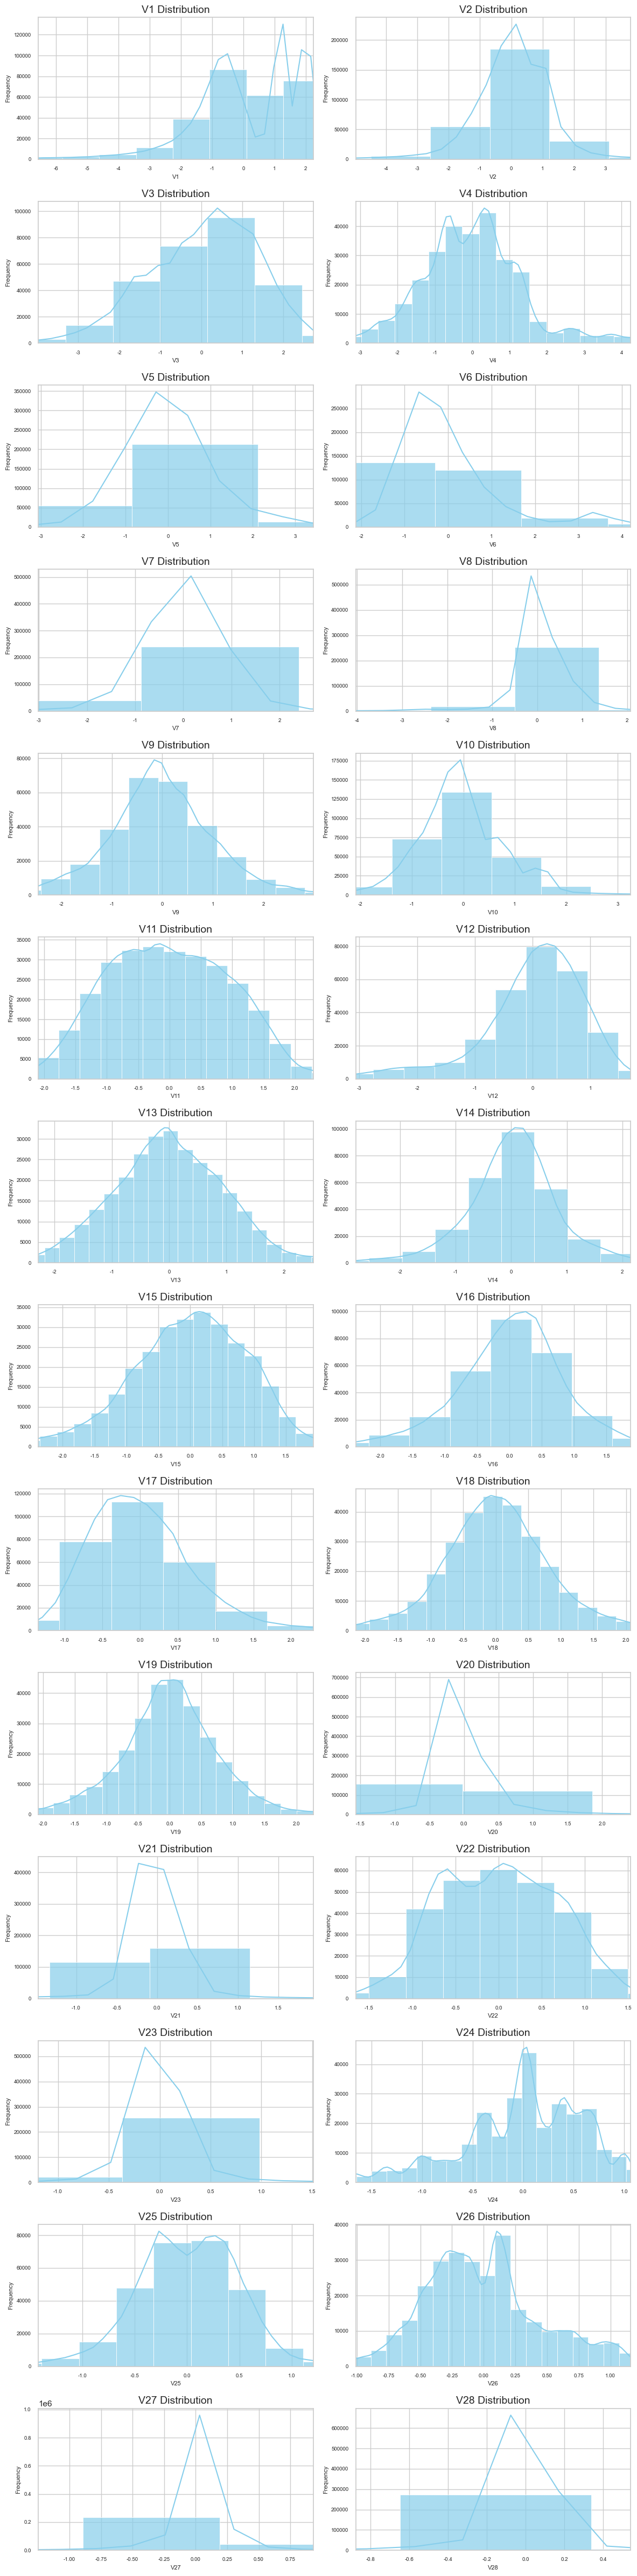

In [13]:
# PCA 변수 리스트 생성
pca_columns = [f'V{i}' for i in range(1, 29)]  # V1부터 V28까지의 PCA 변환 변수 이름 리스트 생성

# 그래프 스타일 설정
sns.set(style="whitegrid")  # Seaborn의 whitegrid 스타일로 그래프 배경 설정
plt.figure(figsize=(12, 48))  # 전체 그림의 크기를 설정 (가로 12인치, 세로 48인치)

# 각 PCA 변수별 히스토그램 생성
for i, col in enumerate(pca_columns, 1):  # 변수 리스트에서 변수 이름과 인덱스를 반복
    plt.subplot(14, 2, i)  # 14행 2열로 서브플롯을 구성하고 현재 플롯의 위치 지정
    sns.histplot(df[col], bins=50, kde=True, color="skyblue", alpha=0.7)  
    # 히스토그램 생성: bins=50으로 구간 설정, KDE(커널 밀도 추정)를 추가, 색상을 파란색으로 지정, 투명도를 0.7로 설정
    plt.title(f'{col} Distribution', fontsize=14)  # 각 서브플롯의 제목 설정
    plt.xlabel(col, fontsize=8)  # x축 라벨 설정
    plt.ylabel('Frequency', fontsize=8)  # y축 라벨 설정
    plt.xticks(fontsize=7)  # x축 눈금 폰트 크기 설정
    plt.yticks(fontsize=7)  # y축 눈금 폰트 크기 설정
    plt.xlim(df[col].quantile(0.01), df[col].quantile(0.99))  
    # x축 범위 설정: 각 변수 값의 1%와 99% 구간으로 제한하여 이상치를 제외한 주요 분포 표시

# 전체 레이아웃 조정
plt.tight_layout()  # 서브플롯 간의 간격을 자동으로 조정하여 보기 좋게 배치
plt.show()  # 그래프 출력


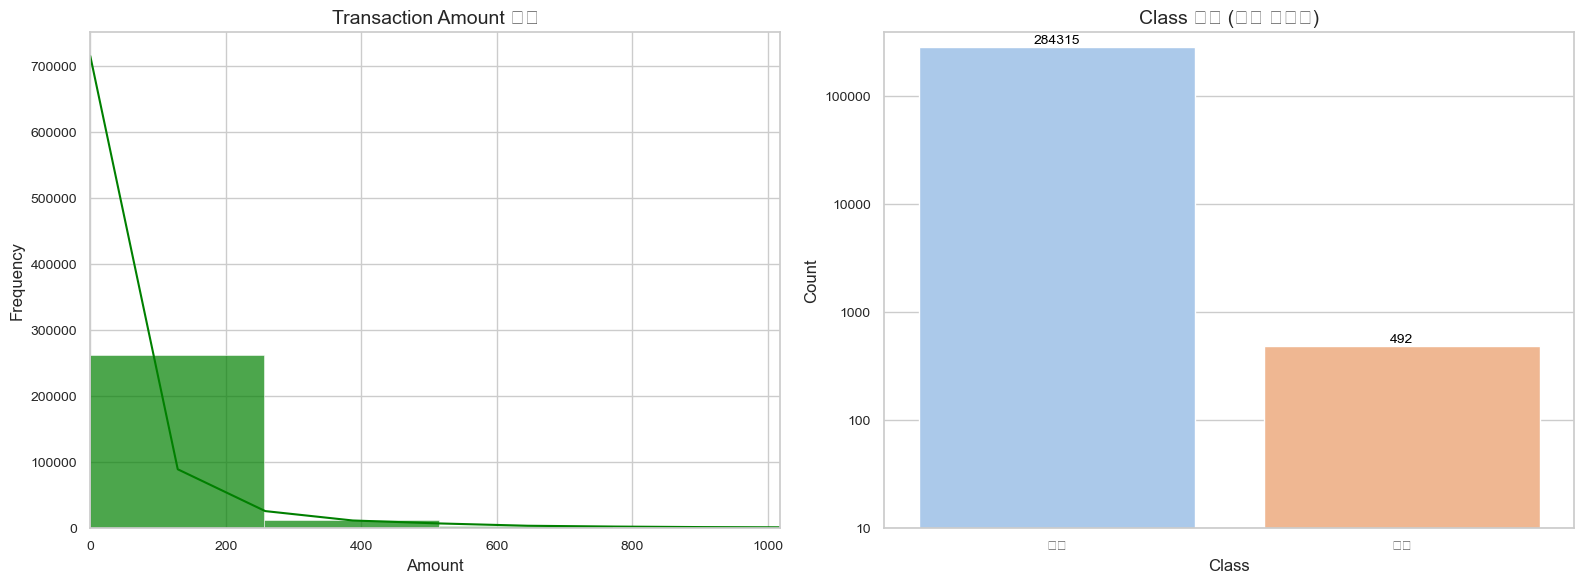

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1행 2열의 서브플롯 생성, 크기 설정 (가로 16인치, 세로 6인치)

# Amount 변수 시각화 (x축 범위 조정)
sns.histplot(df['Amount'], bins=100, kde=True, color="green", alpha=0.7, ax=axes[0])
axes[0].set_title('Transaction Amount 분포', fontsize=14)
axes[0].set_xlabel('Amount', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].set_xlim(0, df['Amount'].quantile(0.99))  # Amount 변수의 0 ~ 99% 구간만 표시

# Class 변수 분포 시각화 (y축 로그 스케일 적용)
sns.countplot(x='Class', data=df, palette="pastel", ax=axes[1])
axes[1].set_title('Class 분포 (로그 스케일)', fontsize=14)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['정상', '사기'], fontsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].set_yscale('log')  # y축을 로그 스케일로 설정
axes[1].set_yticks([10, 100, 1000, 10000, 100000])  # 명시적인 로그 눈금 설정
axes[1].get_yaxis().set_major_formatter(plt.ScalarFormatter())  # 눈금을 숫자로 표시

# 각 막대 위에 카운트 표시
for patch in axes[1].patches:
    count = int(patch.get_height())
    axes[1].text(
        x=patch.get_x() + patch.get_width() / 2,  # 막대의 가운데 x위치
        y=count,  # 막대 높이 위에 텍스트 위치
        s=f'{count}',  # 카운트 값
        ha='center', va='bottom', fontsize=10, color='black'  # 텍스트 정렬 및 스타일
    )

plt.tight_layout()  # 레이아웃 조정
plt.show()


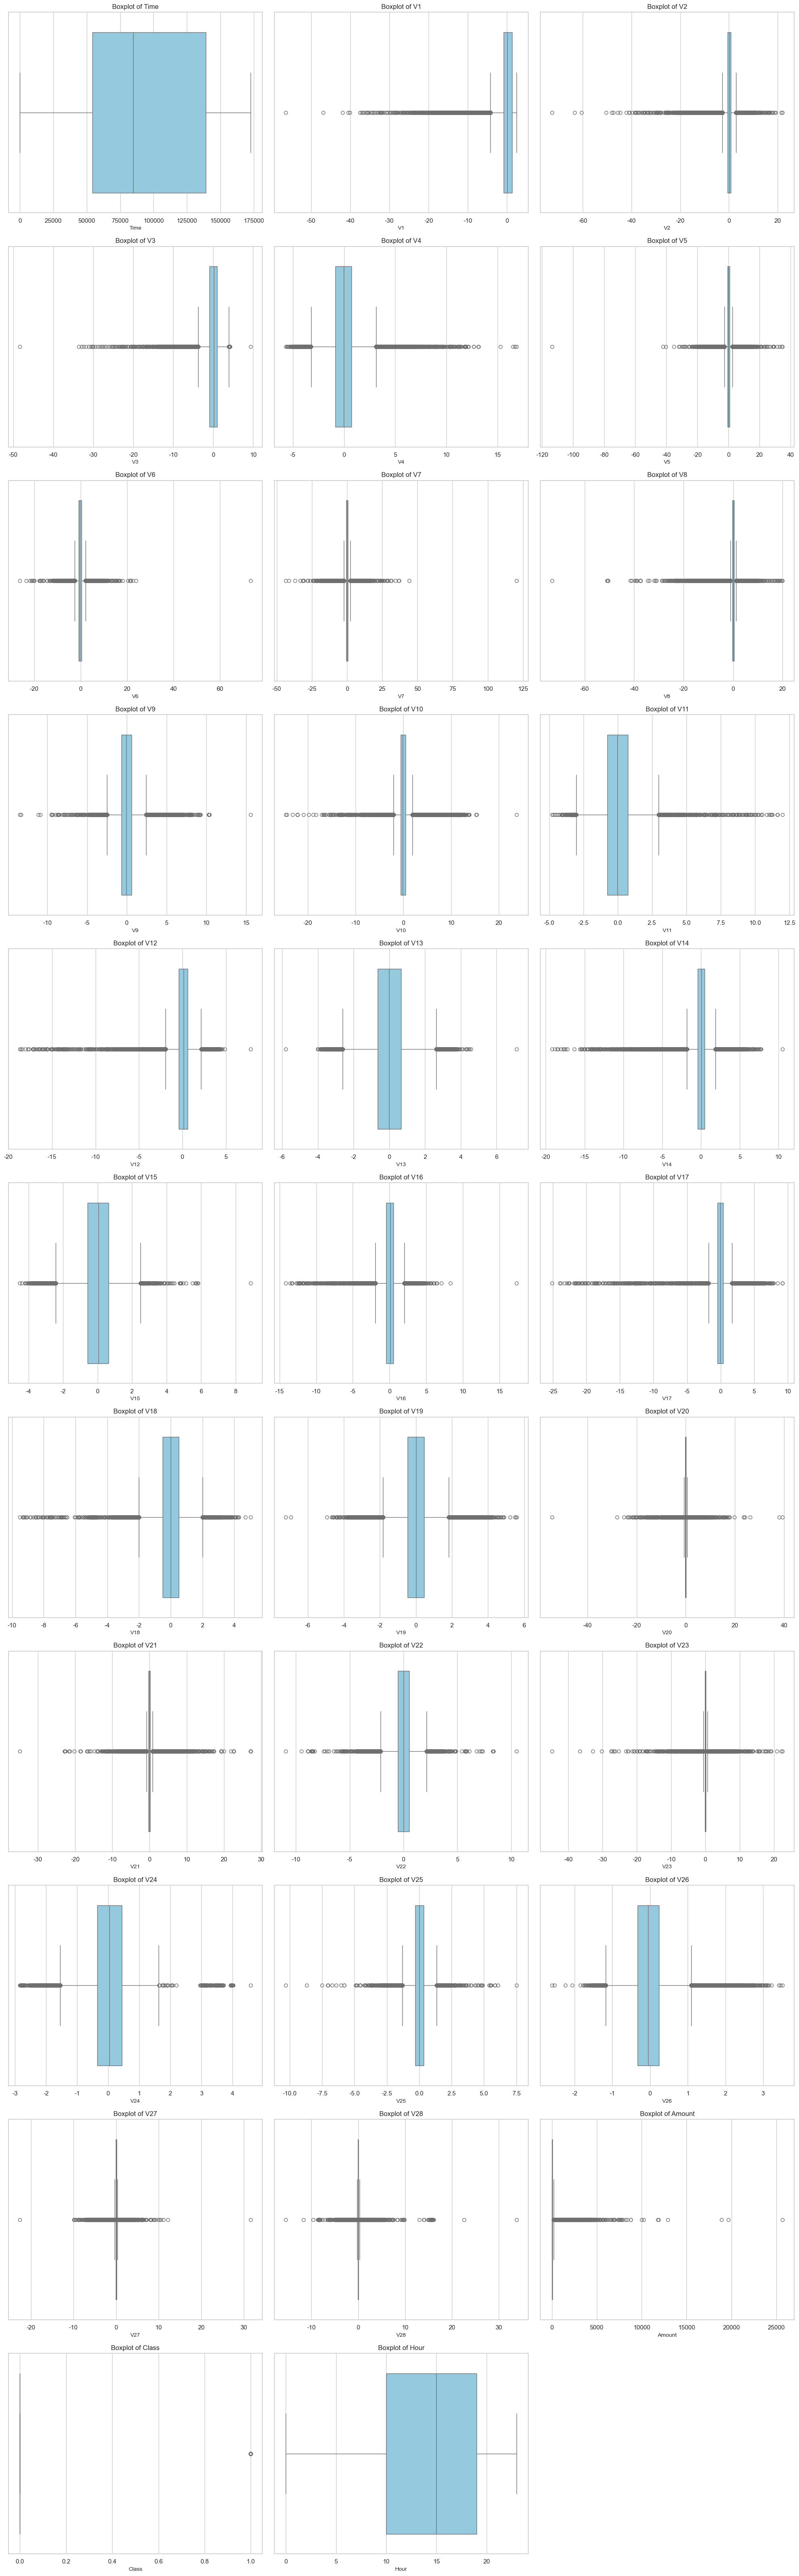

In [19]:
# 모든 수치형 변수에 대해 Boxplot 그리기(이상치 탐지)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, len(numeric_columns) * 2))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

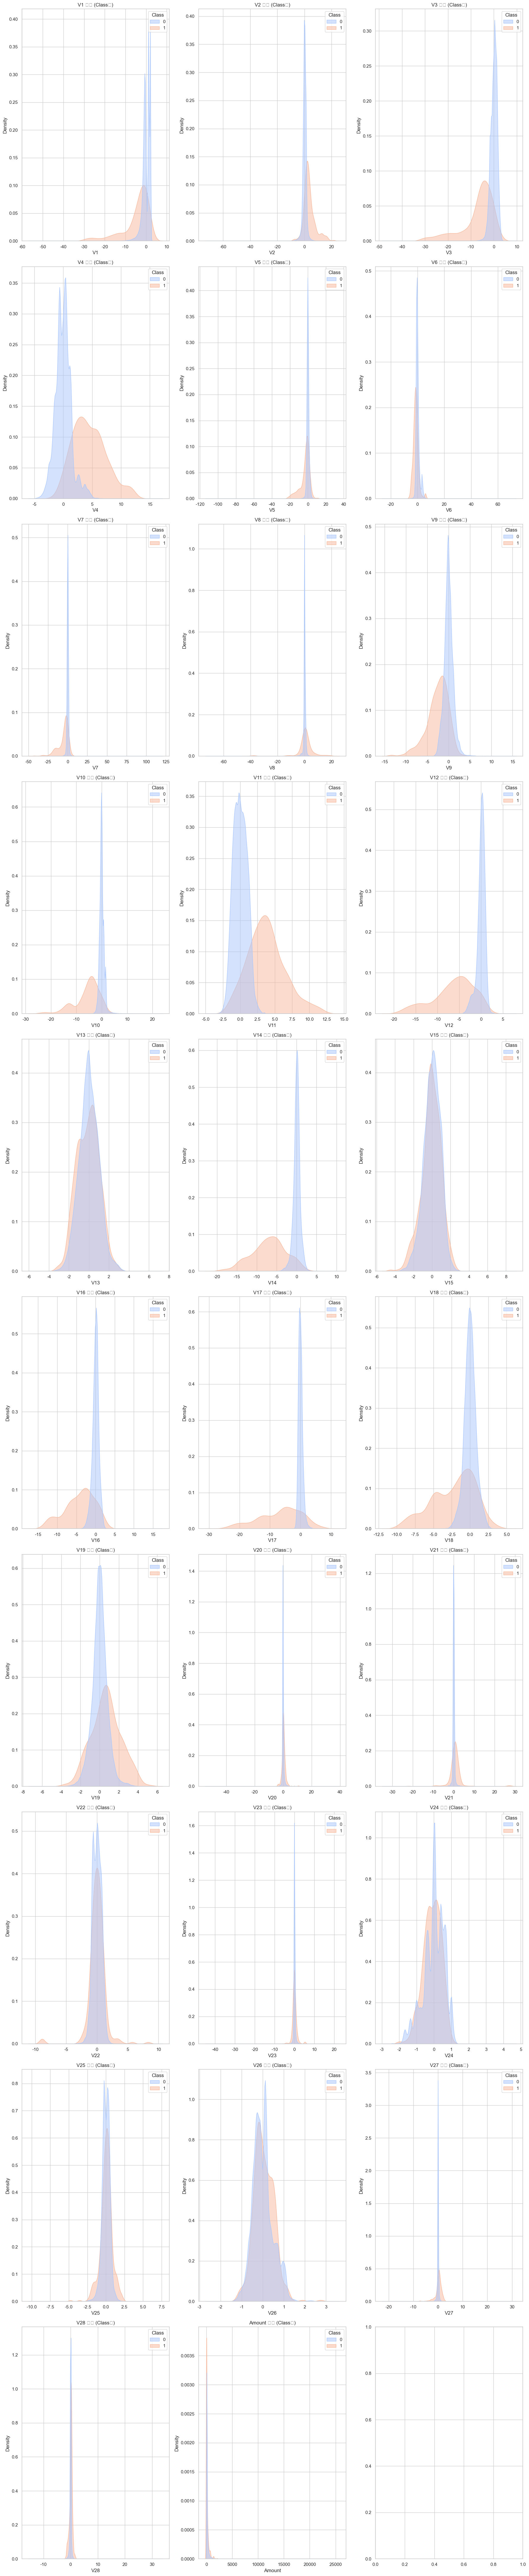

In [21]:
# 주요 변수 선택 (V1 ~ Amount)
selected_columns = [f'V{i}' for i in range(1, 29)] + ['Amount']

# 분포 시각화
fig, axes = plt.subplots(len(selected_columns)//3 + 1, 3, figsize=(18, len(selected_columns)*3))
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    sns.kdeplot(data=df, x=col, hue='Class', fill=True, common_norm=False, alpha=0.5, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} 분포 (Class별)', fontsize=12)

plt.tight_layout()
plt.show()


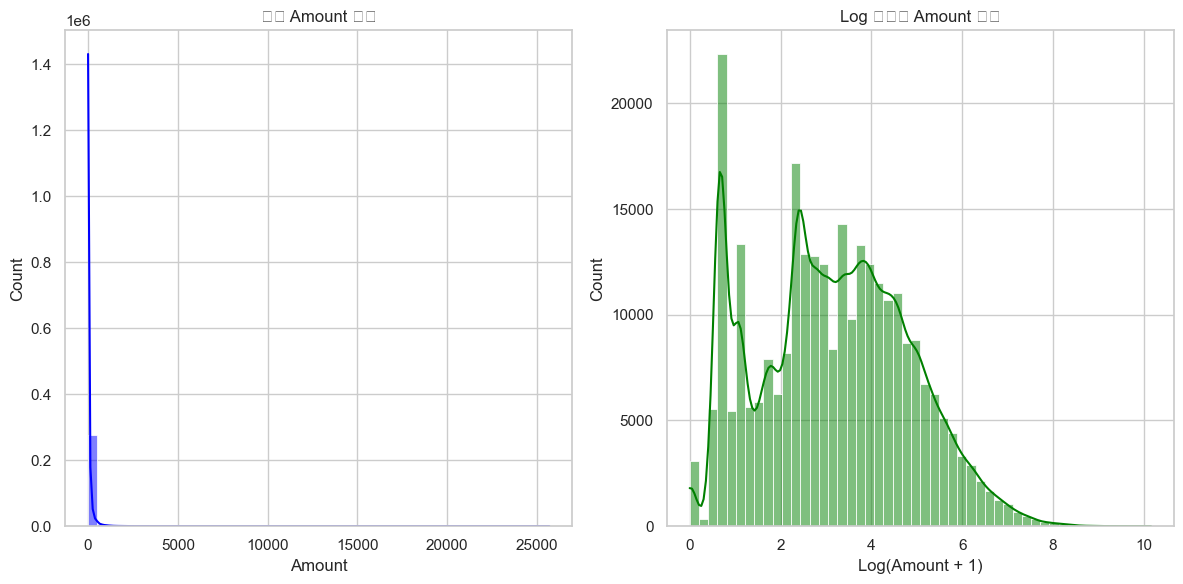

In [23]:
# 로그 변환 적용
df['Amount_log'] = np.log1p(df['Amount'])

# 서브플롯으로 원본 분포와 로그 변환된 분포 비교
plt.figure(figsize=(12, 6))

# 원본 Amount 분포
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('원본 Amount 분포')
plt.xlabel('Amount')

# 로그 변환된 Amount 분포
plt.subplot(1, 2, 2)
sns.histplot(df['Amount_log'], bins=50, kde=True, color='green')
plt.title('Log 변환된 Amount 분포')
plt.xlabel('Log(Amount + 1)')

plt.tight_layout()
plt.show()

In [24]:
# 불필요 컬럼 삭제
df.drop(['Time', 'Amount'],axis=1, inplace=True)

In [25]:
# 스케일링 대상 변수 (V1 ~ V28 + Amount_log)
columns_to_scale = df.drop(['Class','Hour'], axis=1).columns

# RobustScaler 객체 생성
scaler = RobustScaler()

# 독립 변수에 스케일링 적용
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# 스케일링 결과 확인
df[columns_to_scale].head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,0.185689,...,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,0.760297
1,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,-0.074854,...,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.740312
2,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,0.303796,...,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,1.134330
3,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,0.038374,...,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,0.683245
4,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,0.855099,...,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.455970


## 데이터 분할 (Train test split)

In [27]:
# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['Class'])  # 독립 변수
y = df['Class']                # 종속 변수

# 데이터 분할 (학습 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,              # 테스트 데이터 비율
    random_state=42,            # 재현성을 위한 랜덤 시드
    stratify=y                  # 클래스 비율 유지
)

# 분할 결과 확인
print(f"학습 데이터 셋 클래스 분포:\n{y_train.value_counts(normalize=True)}")
print(f"테스트 데이터 셋 클래스 분포:\n{y_test.value_counts(normalize=True)}")


학습 데이터 셋 클래스 분포:
0    0.998271
1    0.001729
Name: Class, dtype: float64
테스트 데이터 셋 클래스 분포:
0    0.99828
1    0.00172
Name: Class, dtype: float64


### 오버 샘플링 SMOTE 기법 적용

In [29]:
# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 클래스 비율 확인
print(f"SMOTE 적용 전:\n{y_train.value_counts()}")
print(f"SMOTE 적용 후:\n{y_train_smote.value_counts()}")

SMOTE 적용 전:
0    227451
1       394
Name: Class, dtype: int64
SMOTE 적용 후:
0    227451
1    227451
Name: Class, dtype: int64


## 모델링 및 평가

### 모델 평가 함수 생성

In [32]:
# 모델 평가 함수 생성
def evaluate_model(model, X_test, y_test, y_pred, y_pred_proba=None):
    """
    모델 평가 결과를 계산하고 데이터프레임으로 반환하는 함수.

    Parameters:
    - model: 학습된 모델
    - X_test: 테스트 데이터
    - y_test: 테스트 데이터의 실제 값
    - y_pred: 테스트 데이터에 대한 예측 값
    - y_pred_proba: 테스트 데이터에 대한 클래스 확률 값 (optional)

    Returns:
    - results_df: 평가 결과를 담은 데이터프레임
    """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results = {
        "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
        "Score": [accuracy, precision, recall, f1, roc_auc if roc_auc is not None else "N/A"]
    }
    
    results_df = pd.DataFrame(results)
    results_df["Score"] = results_df["Score"].apply(lambda x: round(x, 2) if isinstance(x, float) else x)
    
    return results_df


In [33]:
### 혼동행렬 함수 생성

In [34]:
# 혼동행렬 계산
def confusion_mat(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    # 혼동행렬 시각화
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['정상', '사기'], yticklabels=['정상', '사기'])
    plt.title('혼동 행렬')
    plt.xlabel('예측')
    plt.ylabel('실제')
    plt.show()

### 로지스틱 회귀

In [ ]:
# 모델 초기화 및 학습
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)  # 학습 데이터로 모델 학습

# 모델 학습 및 예측
y_pred_lr = lr_model.predict(X_test)  # 테스트 데이터 예측
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]  # 테스트 데이터의 클래스 1 확률 예측

# 평가 함수 호출
lr_results = evaluate_model(lr_model, X_test, y_test, y_pred_lr, y_pred_proba_lr)

# 결과 출력
print("=== 로지스틱 회귀 학습 결과 ===")
print(pd.DataFrame(lr_results))

In [ ]:
# 혼동 행렬 지표 시각화
confusion_mat(y_test, y_pred_lr)

### 랜덤 포레스트

In [ ]:
# 모델 초기화 및 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)  # 학습 데이터로 모델 학습

# 테스트 데이터 예측
y_pred_rf = rf_model.predict(X_test)  # 테스트 데이터 예측
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # 클래스 1 확률 예측

# 평가 함수 호출
rf_results = evaluate_model(rf_model, X_test, y_test, y_pred_rf, y_pred_proba_rf)

# 결과 출력
print("=== Random Forest Results ===")
print(rf_results)

In [ ]:
# 혼동 행렬 지표 시각화
confusion_mat(y_test, y_pred_rf)

## XGboost

In [ ]:
# 모델 초기화 및 학습
xg_model = XGBClassifier(random_state=42)
xg_model.fit(X_train_smote, y_train_smote)  # 학습 데이터로 모델 학습

# 테스트 데이터 예측
y_pred_xg = xg_model.predict(X_test)  # 테스트 데이터 예측
y_pred_proba_xg = xg_model.predict_proba(X_test)[:, 1]  # 클래스 1 확률 예측

# 평가 함수 호출
xg_results = evaluate_model(xg_model, X_test, y_test, y_pred_xg, y_pred_proba_xg)

# 결과 출력
print("=== XGboost Results ===")
print(xg_results)

In [ ]:
# 혼동 행렬 지표 시각화
confusion_mat(y_test, y_pred_xg)

## KNN(K-Nearest Neighbors)

In [ ]:
# 모델 초기화 및 학습
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_smote, y_train_smote)  # 학습 데이터로 모델 학습

# 테스트 데이터 예측
y_pred_knn = knn_model.predict(X_test)  # 테스트 데이터 예측
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # 클래스 1 확률 예측

# 평가 함수 호출
knn_results = evaluate_model(knn_model, X_test, y_test, y_pred_knn, y_pred_proba_knn)

# 결과 출력
print("=== KNN Results ===")
print(knn_results)

In [ ]:
# 혼동 행렬 지표 시각화
confusion_mat(y_test, y_pred_knn)

## LightGBM

In [81]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote, y_train_smote)  # 학습 데이터로 모델 학습

# 테스트 데이터 예측
y_pred_lgb = lgb_model.predict(X_test)  # 테스트 데이터 예측
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]  # 클래스 1 확률 예측

# 평가 함수 호출
lgb_results = evaluate_model(lgb_model, X_test, y_test, y_pred_lgb, y_pred_proba_lgb)

# 결과 출력
print("=== LightGBM Results ===")
print(lgb_results)

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
=== LightGBM Results ===
      Metric  Score
0   Accuracy   1.00
1  Precision   0.56
2     Recall   0.87
3   F1-Score   0.68
4    ROC-AUC   0.96


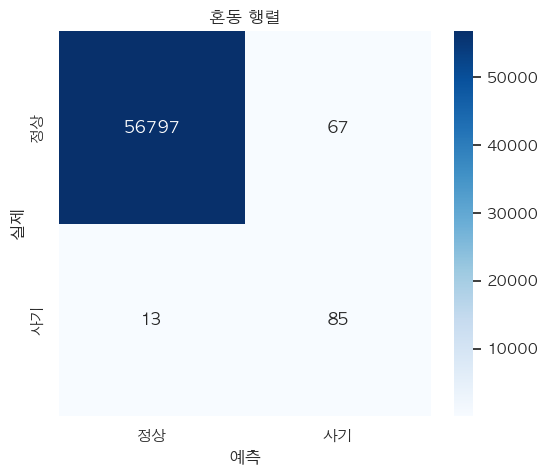

In [87]:
# 혼동 행렬 지표 시각화
confusion_mat(y_test, y_pred_lgb)

## DNN(Deep Neural Network)

In [107]:
# 필요 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random

In [108]:
#모델 시드 고정
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [111]:
# DNN 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 입력층 및 첫 번째 은닉층
    Dropout(0.3),  # 드롭아웃으로 과적합 방지
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dropout(0.2),  # 드롭아웃
    Dense(16, activation='relu'),  # 세 번째 은닉층
    Dropout(0.2),  # 드롭아웃
    Dense(8, activation='relu'),  # 네 번째 은닉층
    Dropout(0.2),  # 드롭아웃
    Dense(1, activation='sigmoid')  # 출력층 (이진 분류를 위해 sigmoid 활성화 함수 사용)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',  # 이진 분류에 적합한 손실 함수
              metrics=['accuracy'])

In [115]:
# Early Stopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 (여기서는 검증 손실)
    patience=5,          # 성능 개선이 없을 경우 몇 에포크를 더 기다릴지 설정
    restore_best_weights=True  # 성능이 가장 좋았던 가중치를 복원
)

In [117]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=30,                # 최대 에포크 수
    batch_size=64,             # 배치 크기
    validation_split=0.2,      # 검증 데이터 비율
    callbacks=[early_stopping], # 조기 종료 콜백 추가
    verbose=1
)

Epoch 1/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 2s 502us/step - accuracy: 0.9928 - loss: 0.0332 - val_accuracy: 0.9984 - val_loss: 0.0051
Epoch 2/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.9985 - loss: 0.0083 - val_accuracy: 0.9991 - val_loss: 0.0048
Epoch 3/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.9989 - loss: 0.0075 - val_accuracy: 0.9994 - val_loss: 0.0061
Epoch 4/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.9987 - loss: 0.0090 - val_accuracy: 0.9994 - val_loss: 0.0063
Epoch 5/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 6/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.9993 - val_loss: 0.0052
Epoch 7/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.9989 - loss: 0.0093 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 8/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9990 -

In [119]:
# 모델 예측 및 평가
y_pred_dnn = (model.predict(X_test) > 0.5).astype("int32")
y_pred_proba_dnn = model.predict(X_test)

results_df = evaluate_model(model, X_test, y_test, y_pred_dnn, y_pred_proba_dnn)
print(results_df)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step
      Metric  Score
0   Accuracy   1.00
1  Precision   0.78
2     Recall   0.80
3   F1-Score   0.79
4    ROC-AUC   0.90


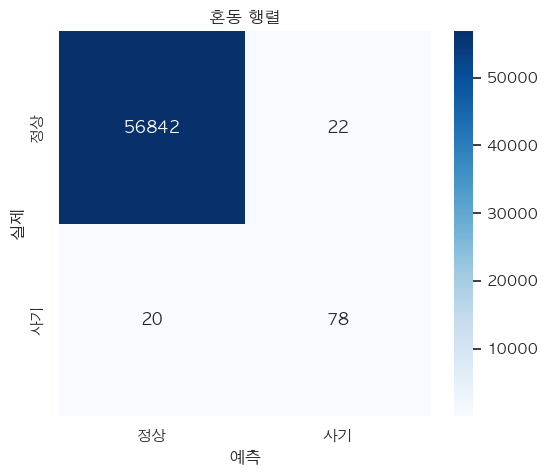

In [120]:
# 혼동 행렬 지표 시각화
confusion_mat(y_test, y_pred_dnn)